In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data = np.loadtxt('ex1data2.txt', delimiter=",")
X = data[:,:2]
y = data[:,2]

y.shape = (y.shape[0], 1)

print(data.shape, X.shape, y.shape, X.shape[1])

(47, 3) (47, 2) (47, 1) 2


In [37]:
def feature_normalization(X):
    """Perform mean normalization"""
    tmp = X
    
    for i in range(X.shape[1]): #  loop on all features
        #mean = np.mean(X[:,i])
        #std = np.std(X[:,i])
        tmp[:,i] = (X[:,i] - np.mean(X[:,i]))/np.std(X[:,i])
    return tmp

In [38]:
def compute_cost(X,y,theta):
    m = y.size

    predictions = X.dot(theta)
    
    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)
    
    return J
    

In [39]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        theta_size = theta.size
    
        for j in range(theta.size):
            tmp = X[:,j]
            tmp.shape = (m,1)
            errors_x1 = (predictions -y) * tmp
            
            theta[j][0] = theta[j][0] - alpha * 1/m * errors_x1.sum()
            
        J_history[i, 0] = compute_cost(X, y, theta)
        
    return theta, J_history

In [40]:
X_norm = feature_normalization(X)

# Add one col to X_norm
X_norm = np.hstack((np.ones([X_norm.shape[0],1]), X_norm))
X_norm.shape


(47, 3)

In [41]:
theta = np.zeros((X_norm.shape[1], 1))
iterations = 50
alpha = 0.1

theta, J_history = gradient_descent(X_norm, y, theta, alpha,iterations )

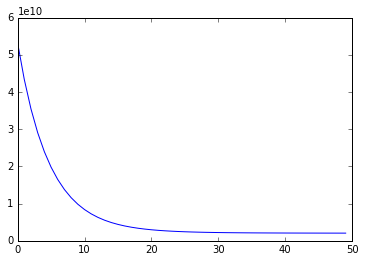

In [42]:
%matplotlib inline
plt.plot(J_history)

In [43]:
theta.shape

(3, 1)

In [44]:
# House cost
(theta[0] + theta[1] * 1650 + theta[2] * 3)[0]

170819902.58050677

# Normal Equations

In [45]:
def normal_equations(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta
    

In [46]:
theta = normal_equations(X_norm,y)
(theta[0] + theta[1] * 1650 + theta[2] * 3)[0]

180909541.76992106